# Project Assignment A - Project prompt
The first part of the final project is an 2 minute movie, which should explain the central idea/concept that you will investigate in your final project. You're making the movie so that the TAs and I can give you feedback, and so that other groups can steal your ideas (and you can steal ideas from them). The movie must contain the following

* **An explanation of the central idea behind your final project (what is the idea? which datasets do you need to explore the idea?, why is it interesting?)**
* **A mock up of the visualization that you wish to build. (Anything is fine here. Pen and paper, MS Paint, Inkscape, D3, anything.).**
* **Make sure you answer the questions**
    * **What genre is it? (for Genres, see section 4.3 of the Segel and Heer paper)**
    * **Why is that genre right for telling the story you want to communicate with the data**
* **An outline on the elements you'll need to get to your goal.**
* **The implementation plan.**
* **A walk-through of your preliminary data-analysis, addressing**
    * **What is the total size of your data? (MB, number of rows, number of variables, etc)**
    * **What are other properties? (What is the date range? Is is it geo-data?, then a quick plot of locations, etc.)**
    * **Show the fundamental distributions of the data (similar to the work we did on SF crime data for lecture 3)**

But other than that, there are no constraints. And we do appreciate funny/inventive/beautiful movies, although the academic content is most important. Note that we'll display the movie to the entire class.

(The maximum length is 2 minutes, but its OK if the movie is shorter.)

Handing in the assignment: Simply upload your video to youtube or another video hosting site (the higher the resolution the better) and submit the link to peergrade.

# Our answers - outline of video

* **An explanation of the central idea behind your final project (what is the idea? which datasets do you need to explore the idea?, why is it interesting?)**

* **A mock up of the visualization that you wish to build. (Anything is fine here. Pen and paper, MS Paint, Inkscape, D3, anything.).**
* **Make sure you answer the questions**
    * **What genre is it? (for Genres, see section 4.3 of the Segel and Heer paper)**
    * **Why is that genre right for telling the story you want to communicate with the data**

* **An outline on the elements you'll need to get to your goal.**

* **The implementation plan.**

* **A walk-through of your preliminary data-analysis, addressing**
    * **What is the total size of your data? (MB, number of rows, number of variables, etc)**
    * **What are other properties? (What is the date range? Is is it geo-data?, then a quick plot of locations, etc.)**
    * **Show the fundamental distributions of the data (similar to the work we did on SF crime data for lecture 3)**
   

Two main datasets:
1. LFB Incident Records
2. LFB Mobilisation Records (for fire engines)

* Should be able to connect some reconds together on the Incident Number.

Perhaps adding attitional datasets
1. Bariatric incidents attended by LFB (special services)
2. Weather data


### LFB Incident Records
* Every incided responded to since January 2009 to the end of previous month.
* Due to size it is split into three zip/Excel files
    1. (January 2009 - December 2012) - 80.49 MB - Zip file - 485.056 rows
    2. (January 2013 - December 2016) - 68.64 MB - Zip file - 403.985 rows
    3. (January 2017 - March 2020) - 65.85 MB - Excel file - 330.515 rows
* Number of variables = 36
    1. IncidentNumber
    2. DateOfCall
    3. CalYear
    4. TimeOfCall
    5. HourOfCall
    6. IncidentGroup
    7. StopCodeDescription
    8. SpecialServiceType
    9. PropertyCategory
    10. PropertyType
    11. AddressQualifier
    12. Postcode_full
    13. Postcode_district
    14. IncGeo_BoroughCode
    15. IncGeo_BoroughName
    16. ProperCase
    17. IncGeo_WardCode
    18. IncGeo_WardName
    19. IncGeo_WardNameNew
    20. Easting_m
    21. Northing_m
    22. Easting_rounded
    23. Northing_rounded
    24. *Latitude*
    25. *Longitude*
    26. FRS
    27. IncidentStationGround
    28. FirstPumpArriving_AttendanceTime
    29. FirstPumpArriving_DeployedFromStation
    30. SecondPumpArriving_AttendanceTime
    31. SecondPumpArriving_DeployedFromStation
    32. NumStationsWithPumpsAttending
    33. NumPumpsAttending
    34. *PumpCount*
    35. *PumpHoursRoundUp*
    36. *Notional Cost (£)*
    
*Italic columns are missing in the earlier datasets nr. 1 and 2*

* Date range: January 2009 - March 2020
* Yes it includes geo data, both latitude and longitude in some cases. In other cases it containes the area in different attributes such as BoroughName, WardName. 

In [1]:
# Import necessary libraries and apply settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from IPython.display import Image
%matplotlib inline

In [2]:
# Start by reading in the dataset and combine the Date and Time columns into a single datetime column
df1 = pd.read_excel('IncidentData/LFB Incident data from January 2009 to December 2012.xlsx', index_col=None)

In [3]:
df2 = pd.read_excel('IncidentData/LFB Incident data from January 2013 to December 2016.xlsx', index_col=None)
df3 = pd.read_excel('IncidentData/LFB Incident data from January 2017.xlsx', index_col=None)

In [4]:
len(df1.columns)

31

In [5]:
len(df2.columns)

31

In [6]:
len(df3.columns)

36

In [7]:
df = df3.append(df2, sort='False')
df = df.append(df1, sort = 'False')

# Reindex so the columns are in the same order as before
df = df.reindex(df3.columns, axis=1)

In [8]:
df

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
0,000828-02012017,2017-01-02,2017,17:38:04,17,Special Service,Special Service,Rescue or evacuation from water,Outdoor,River/canal,...,Lambeth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000566-02012017,2017-01-02,2017,07:34:43,7,Special Service,Special Service,No action (not false alarm),Dwelling,House - single occupancy,...,Old Kent Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000960-03012017,2017-01-03,2017,00:36:15,0,Special Service,Special Service,Assist other agencies,Outdoor,River/canal,...,Lambeth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001546-04012017,2017-01-04,2017,12:09:01,12,Special Service,Special Service,Effecting entry/exit,Road Vehicle,Car,...,Erith,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
4,002759-06012017,2017-01-06,2017,22:59:46,22,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,Shoreditch,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
5,003917-09012017,2017-01-09,2017,18:48:31,18,Special Service,Special Service,No action (not false alarm),Dwelling,Converted Flat/Maisonettes - 3 or more storeys,...,Kensington,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
6,004015-09012017,2017-01-09,2017,23:17:49,23,Special Service,Special Service,Suicide/attempts,Outdoor,Canal/riverbank vegetation,...,Lambeth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,004367-10012017,2017-01-10,2017,20:54:46,20,Special Service,Special Service,Assist other agencies,Outdoor,Canal/riverbank vegetation,...,Lambeth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,005097-12012017,2017-01-12,2017,18:49:27,18,False Alarm,False alarm - Good intent,NaN,Road Vehicle,Car,...,Norbury,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
9,005272-13012017,2017-01-13,2017,07:51:28,7,Special Service,Special Service,Flooding,Boat,Naval vessel,...,Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.describe()

,CalYear,HourOfCall,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)
count,1.219556e+06,1.219556e+06,653268.000000,653268.000000,1.219556e+06,1.219556e+06,166844.000000,166844.000000,990522.000000,124638.000000,1.212685e+06,1.212685e+06,329134.000000,329028.000000,329028.000000
mean,2.013852e+03,1.351764e+01,530657.479266,180364.060011,5.306936e+05,1.805067e+05,51.464024,-0.118419,319.871757,392.833919,1.353266e+00,1.558481e+00,1.609338,1.374764,457.423523
std,3.300590e+00,6.217319e+00,10407.713846,7467.555698,9.799656e+03,7.366337e+03,1.498213,0.148093,141.765503,149.014739,6.284672e-01,8.045668e-01,1.716805,7.432840,2467.251872
min,2.009000e+03,0.000000e+00,56117.000000,17945.000000,5.615000e+04,1.795000e+04,0.000000,-0.510155,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,326.000000
25%,2.011000e+03,9.000000e+00,525275.000000,176024.000000,5.253500e+05,1.762500e+05,51.468485,-0.197628,231.000000,297.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,328.000000
50%,2.014000e+03,1.400000e+01,530797.000000,180987.000000,5.309500e+05,1.810500e+05,51.513188,-0.117245,296.000000,368.000000,1.000000e+00,1.000000e+00,1.000000,1.000000,333.000000
75%,2.017000e+03,1.900000e+01,536834.000000,184911.000000,5.363500e+05,1.851500e+05,51.548645,-0.027925,379.000000,457.000000,2.000000e+00,2.000000e+00,2.000000,1.000000,339.000000
max,2.020000e+03,2.300000e+01,628647.000000,275646.000000,6.286500e+05,5.312500e+05,51.691568,0.310609,1200.000000,1200.000000,4.600000e+01,1.060000e+02,319.000000,2163.000000,709464.000000


In [10]:
# We have Null values in a lot of columns. 
df.count().sort_values()

SecondPumpArriving_DeployedFromStation     124635
SecondPumpArriving_AttendanceTime          124638
Latitude                                   166844
Longitude                                  166844
PumpHoursRoundUp                           329028
Notional Cost (£)                          329028
PumpCount                                  329134
SpecialServiceType                         371738
Northing_m                                 653268
Postcode_full                              653268
Easting_m                                  653268
FirstPumpArriving_DeployedFromStation      990516
FirstPumpArriving_AttendanceTime           990522
NumStationsWithPumpsAttending             1212685
NumPumpsAttending                         1212685
StopCodeDescription                       1219555
PropertyCategory                          1219555
PropertyType                              1219555
IncidentGroup                             1219555
IncidentStationGround                     1219556


In [11]:
df.columns

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'IncGeo_BoroughCode', 'IncGeo_BoroughName',
       'ProperCase', 'IncGeo_WardCode', 'IncGeo_WardName',
       'IncGeo_WardNameNew', 'Easting_m', 'Northing_m', 'Easting_rounded',
       'Northing_rounded', 'Latitude', 'Longitude', 'FRS',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpHoursRoundUp', 'Notional Cost (£)'],
      dtype='object')

Text(0, 0.5, 'Incident Count')

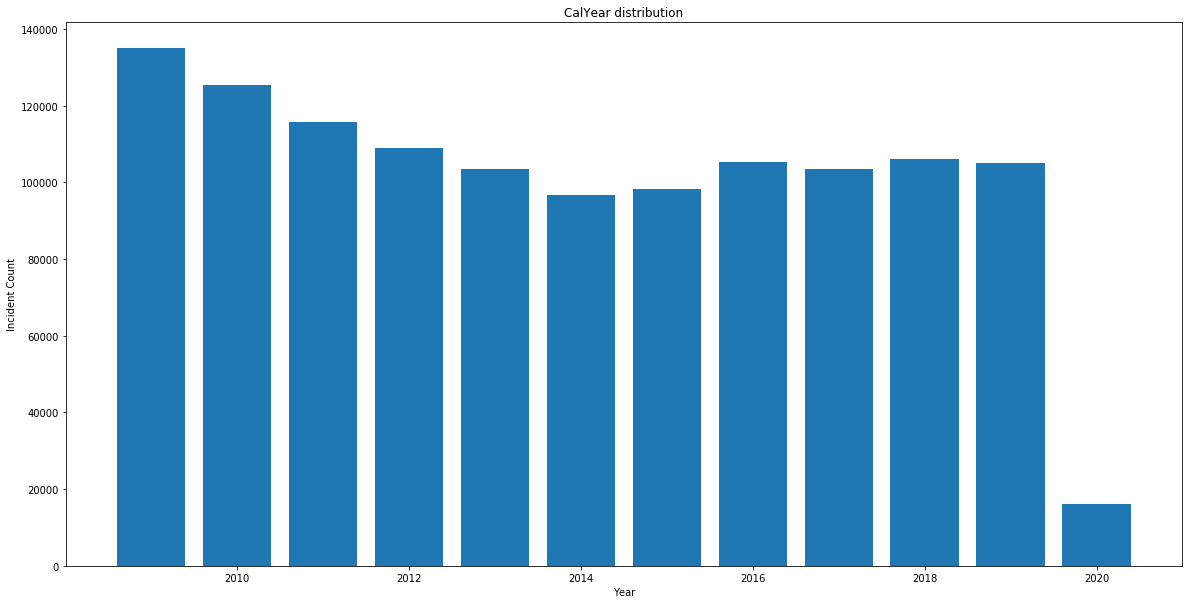

In [12]:
#df.CalYear.value_counts().values
plt.figure(figsize=(20,10))
plt.bar(df.CalYear.value_counts().index, df.CalYear.value_counts().values)
plt.title('CalYear distribution')
plt.xlabel('Year')
plt.ylabel('Incident Count')

/Users/kristin/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Incident Count')

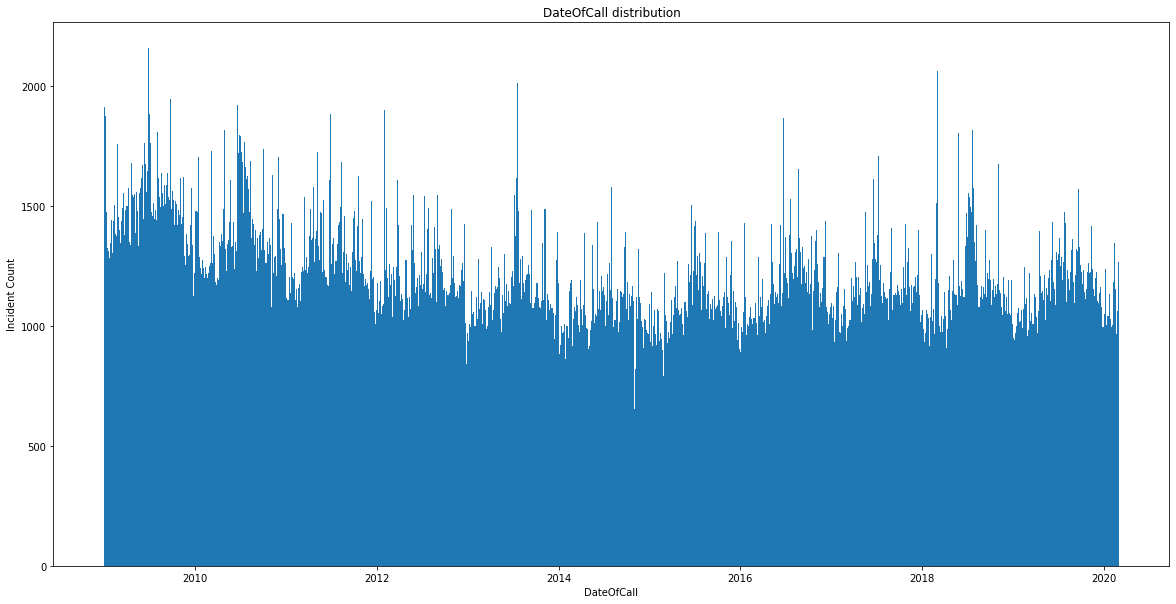

In [13]:
plt.figure(figsize=(20,10))
plt.hist(df.DateOfCall, 1000);
plt.title('DateOfCall distribution')
plt.xlabel('DateOfCall')
plt.ylabel('Incident Count')

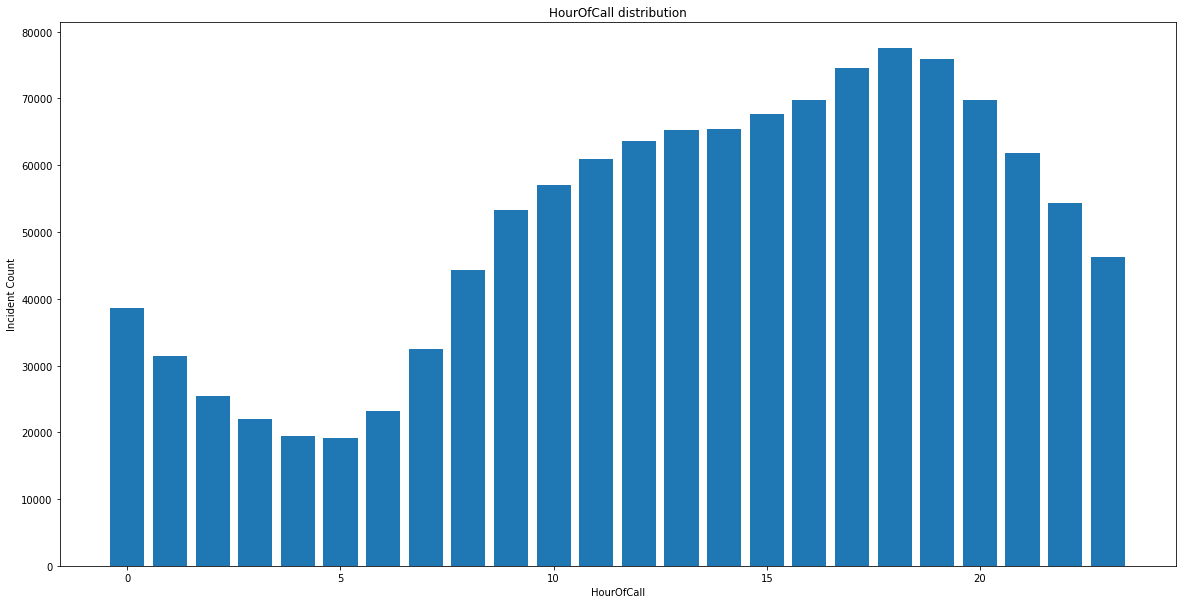

In [14]:

#df.CalYear.value_counts().values
plt.figure(figsize=(20,10))
plt.bar(df.HourOfCall.value_counts().index, df.HourOfCall.value_counts().values)
plt.title('HourOfCall distribution');
plt.xlabel('HourOfCall');
plt.ylabel('Incident Count');

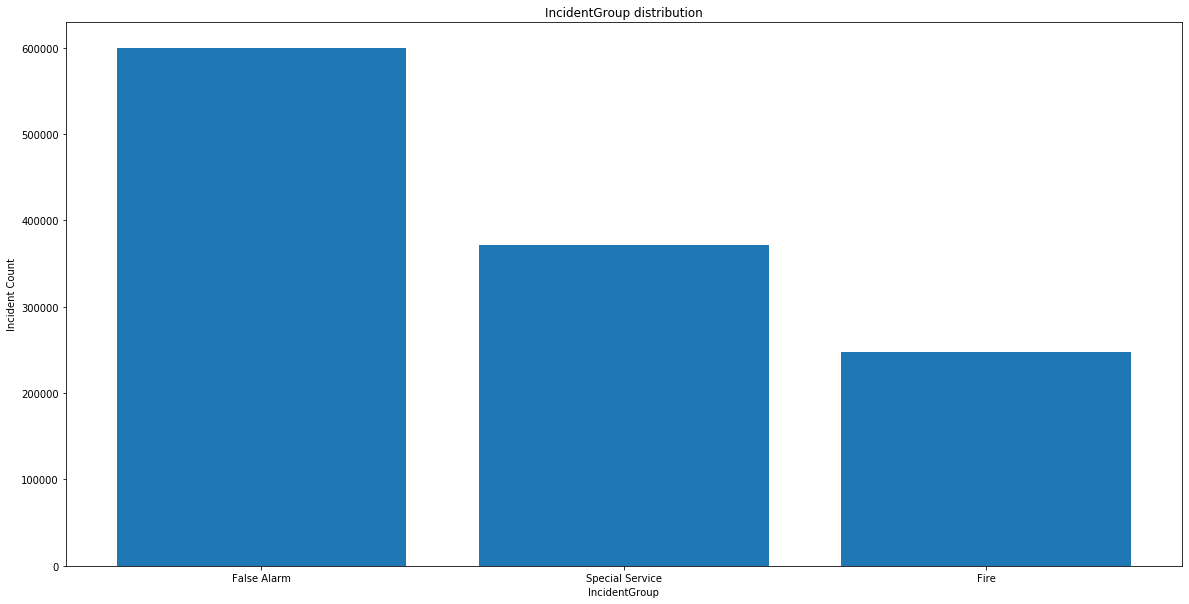

In [15]:
plt.figure(figsize=(20,10))
plt.bar(df.IncidentGroup.value_counts().index, df.IncidentGroup.value_counts().values)
plt.title('IncidentGroup distribution');
plt.xlabel('IncidentGroup');
plt.ylabel('Incident Count');

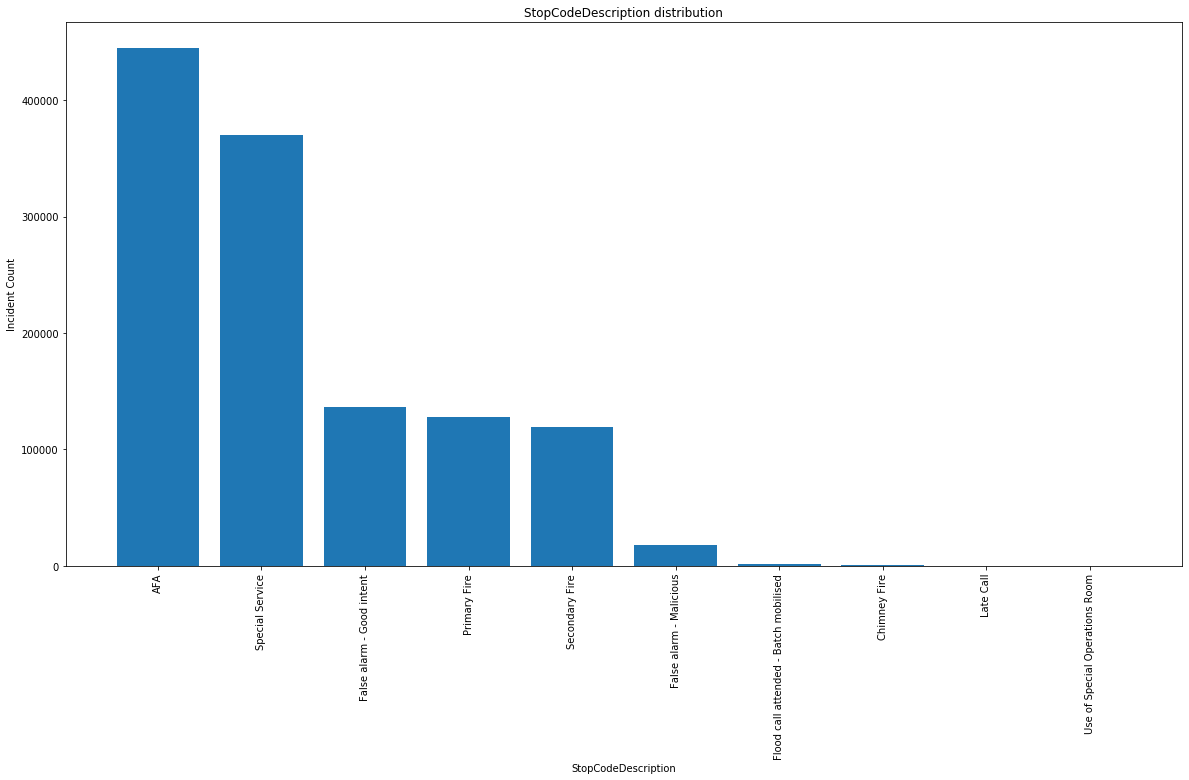

In [16]:
plt.figure(figsize=(20,10))
plt.bar(df.StopCodeDescription.value_counts().index, df.StopCodeDescription.value_counts().values)
plt.xticks(rotation=90)
plt.title('StopCodeDescription distribution');
plt.xlabel('StopCodeDescription');
plt.ylabel('Incident Count');

<font color='red'>AFA: Automatic Fire Alarm/Actuating Fire Alarm
    source: Wikipedia Glossary of firefighting
Does that make sense? This is always the case if the incidentGroup == False Alarm, and never without it.</font>
https://en.wikipedia.org/wiki/Glossary_of_firefighting

**Highlighting the problem of unwanted calls and false alarms from AFA systems**
http://www.cfoa.org.uk/10863
Over many years the Fire and Rescue Service (FRS) have been working with partners to reduce the number of Unwanted Fire Signals (UwFS) that are generated from premises protected by automatic fire detection and fire alarm (AFA) systems. A considerable reduction (about a third) has been seen in recent years. However, despite this reduction, it remains clear that there is still the need for significant improved action associated with the management of false alarms and the numbers of resulting UwFS.

In [31]:
df[(df.StopCodeDescription == 'AFA') & (df.IncidentGroup != 'False Alarm')]

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£)


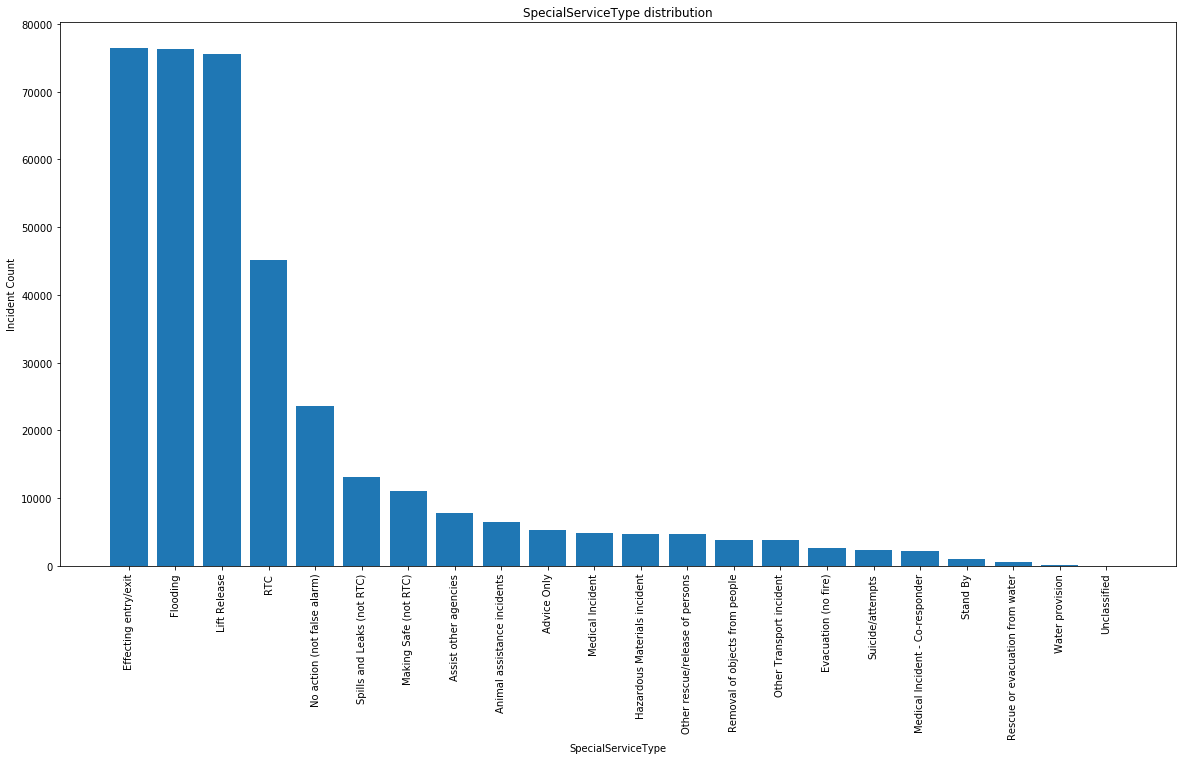

In [17]:
plt.figure(figsize=(20,10))
plt.bar(df.SpecialServiceType.value_counts().index, df.SpecialServiceType.value_counts().values)
plt.xticks(rotation=90)
plt.title('SpecialServiceType distribution');
plt.xlabel('SpecialServiceType');
plt.ylabel('Incident Count');

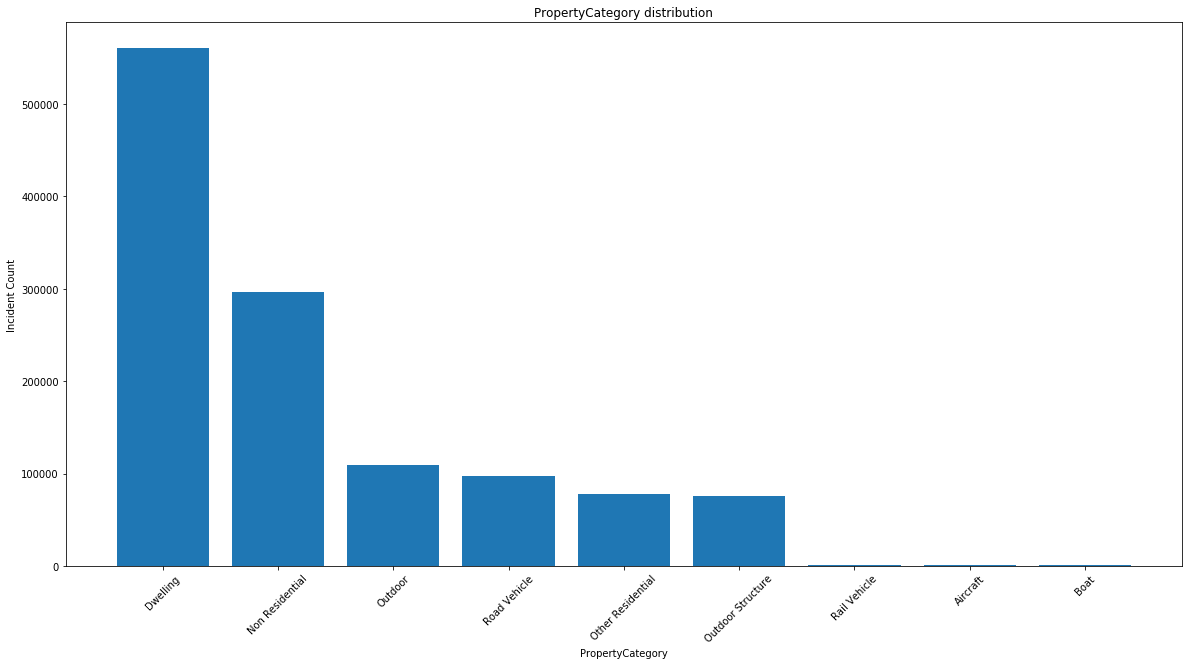

In [18]:
plt.figure(figsize=(20,10))
plt.bar(df.PropertyCategory.value_counts().index, df.PropertyCategory.value_counts().values)
plt.xticks(rotation=45)
plt.title('PropertyCategory distribution');
plt.xlabel('PropertyCategory');
plt.ylabel('Incident Count');

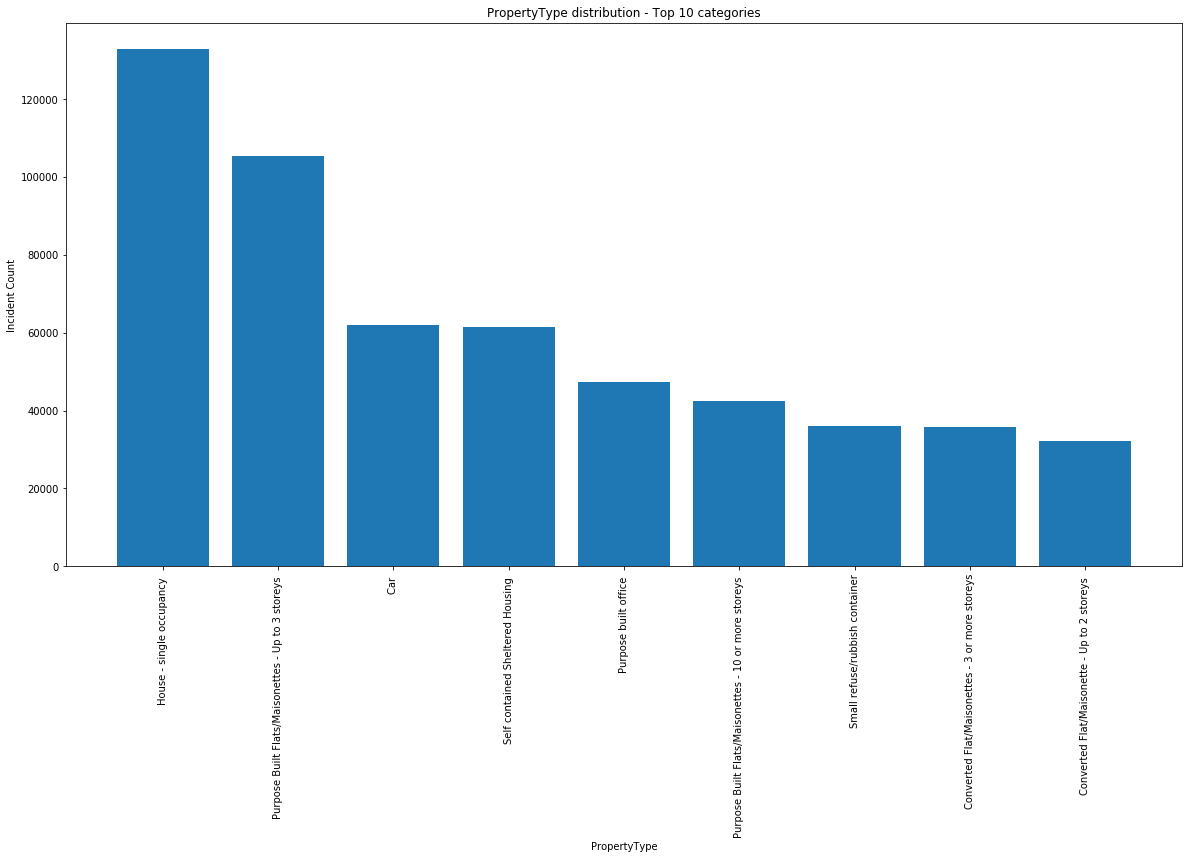

In [19]:
plt.figure(figsize=(20,10))
plt.bar(df.PropertyType.value_counts().index[1:10], df.PropertyType.value_counts().values[1:10])
plt.xticks(rotation=90)
plt.title('PropertyType distribution - Top 10 categories');
plt.xlabel('PropertyType');
plt.ylabel('Incident Count');

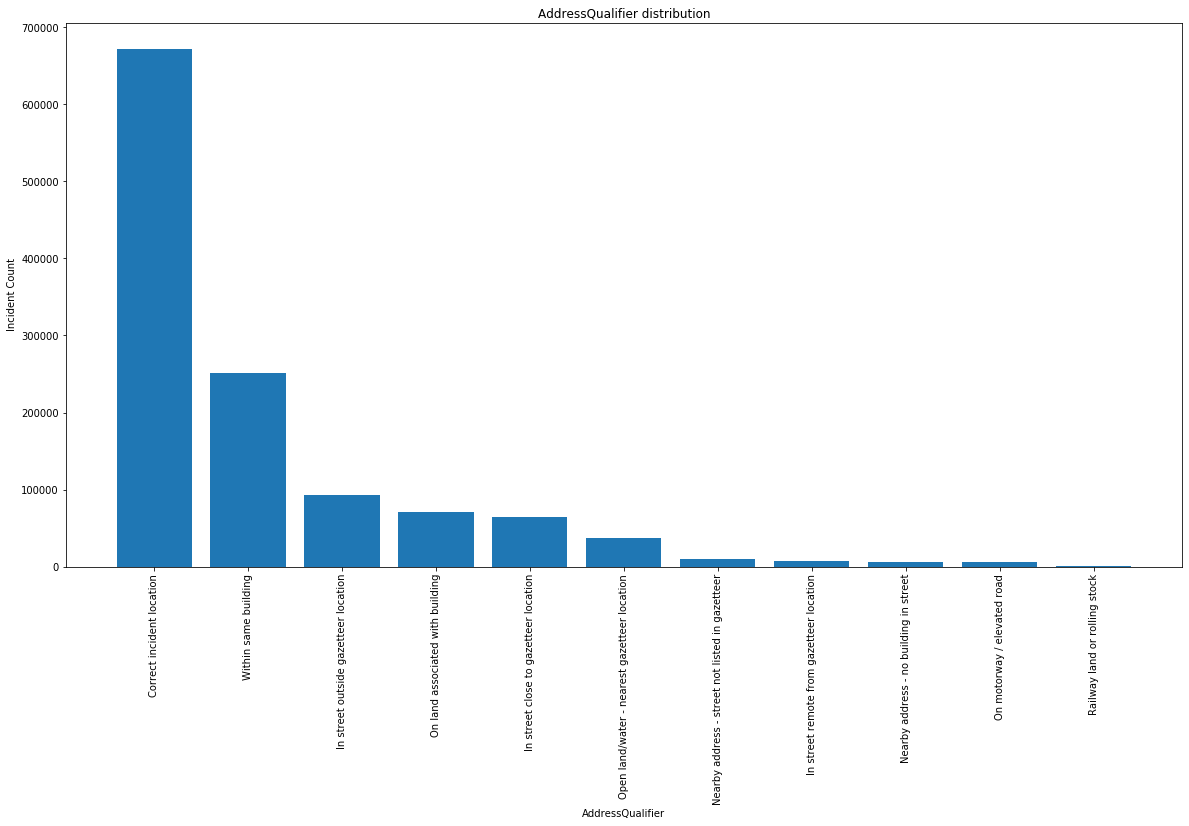

In [20]:
plt.figure(figsize=(20,10))
plt.bar(df.AddressQualifier.value_counts().index, df.AddressQualifier.value_counts().values)
plt.xticks(rotation=90)
plt.title('AddressQualifier distribution');
plt.xlabel('AddressQualifier');
plt.ylabel('Incident Count');

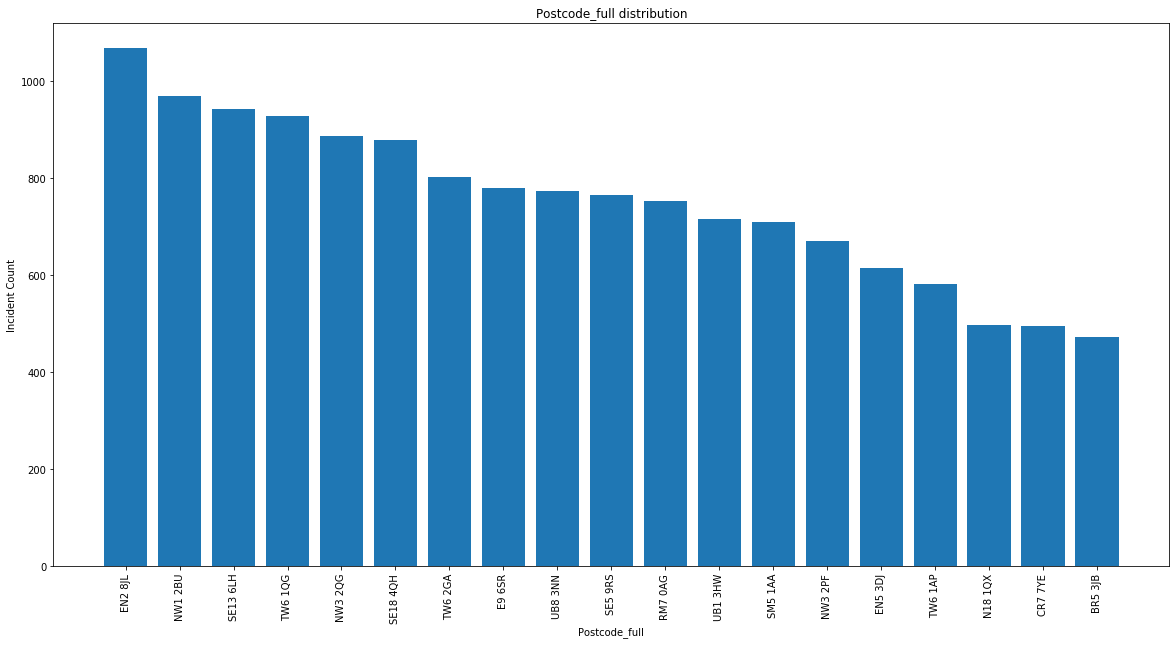

In [21]:
plt.figure(figsize=(20,10))
plt.bar(df.Postcode_full.value_counts().index[1:20], df.Postcode_full.value_counts().values[1:20])
plt.xticks(rotation=90)
plt.title('Postcode_full distribution');
plt.xlabel('Postcode_full');
plt.ylabel('Incident Count');

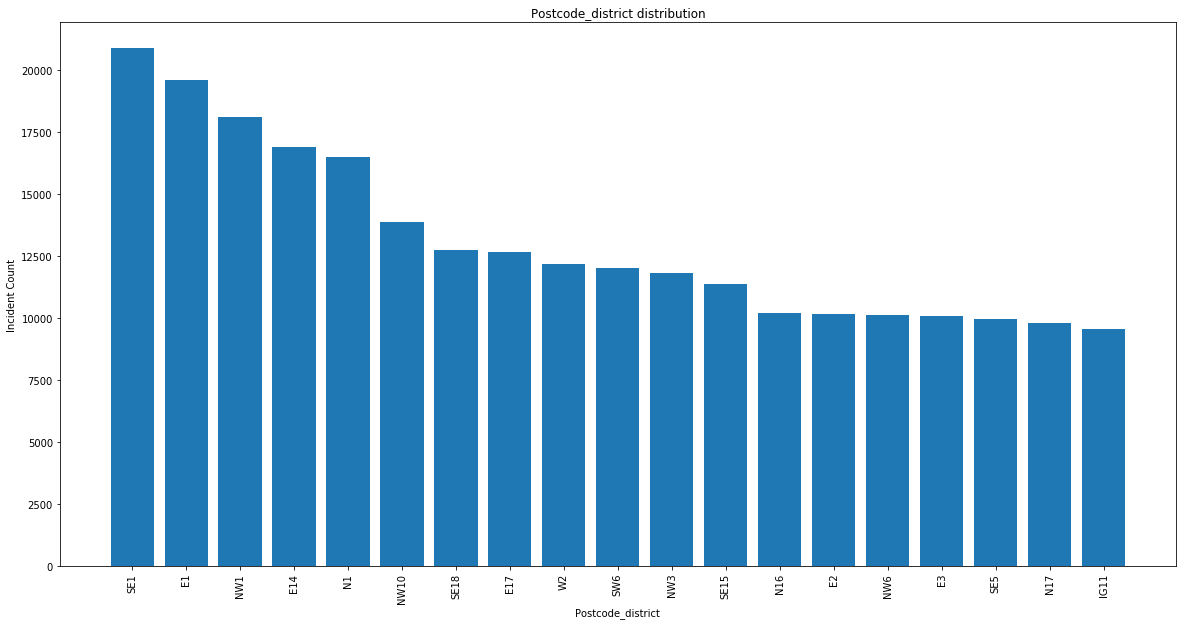

In [22]:
plt.figure(figsize=(20,10))
plt.bar(df.Postcode_district.value_counts().index[1:20], df.Postcode_district.value_counts().values[1:20])
plt.xticks(rotation=90)
plt.title('Postcode_district distribution');
plt.xlabel('Postcode_district');
plt.ylabel('Incident Count');

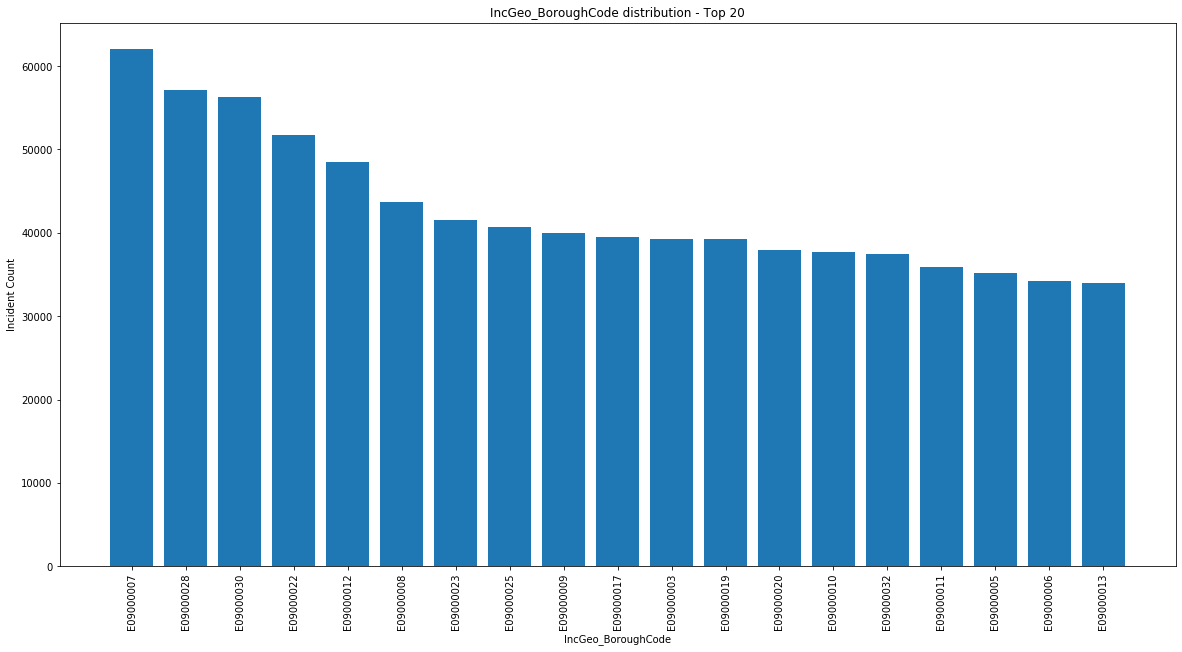

In [23]:
plt.figure(figsize=(20,10))
plt.bar(df.IncGeo_BoroughCode.value_counts().index[1:20], df.IncGeo_BoroughCode.value_counts().values[1:20])
plt.xticks(rotation=90)
plt.title('IncGeo_BoroughCode distribution - Top 20');
plt.xlabel('IncGeo_BoroughCode');
plt.ylabel('Incident Count');

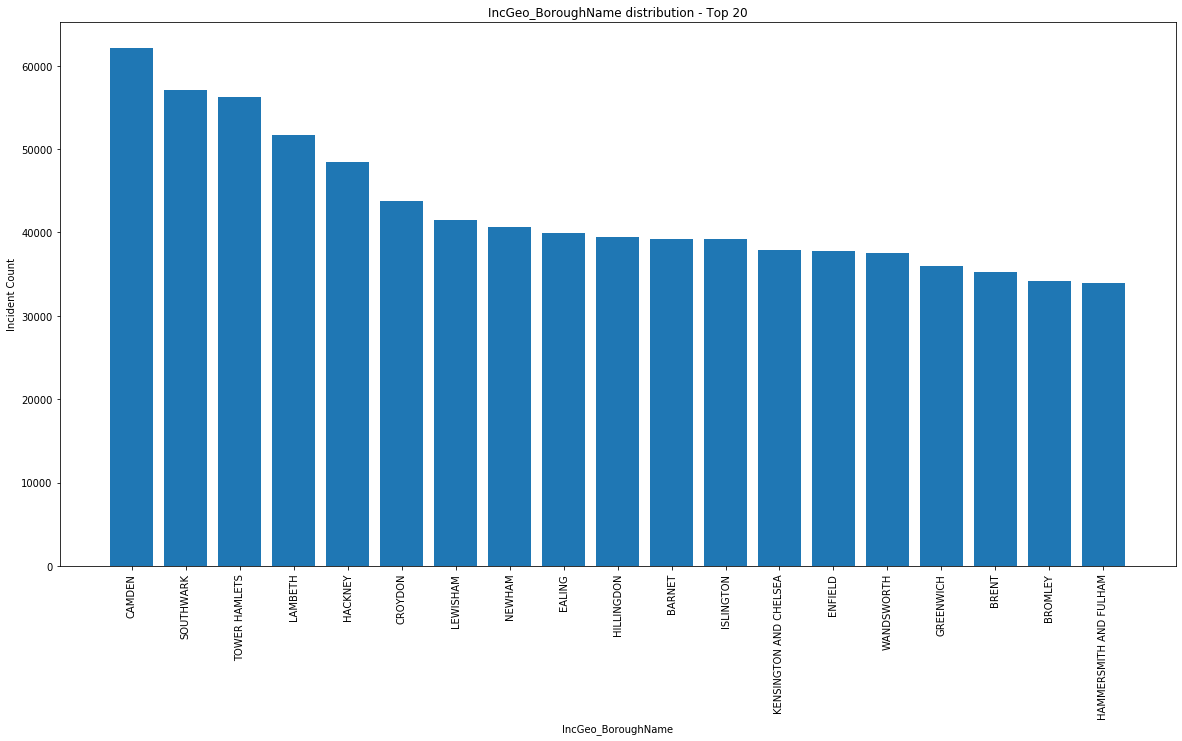

In [24]:
plt.figure(figsize=(20,10))
plt.bar(df.IncGeo_BoroughName.value_counts().index[1:20], df.IncGeo_BoroughName.value_counts().values[1:20])
plt.xticks(rotation=90)
plt.title('IncGeo_BoroughName distribution - Top 20');
plt.xlabel('IncGeo_BoroughName');
plt.ylabel('Incident Count');

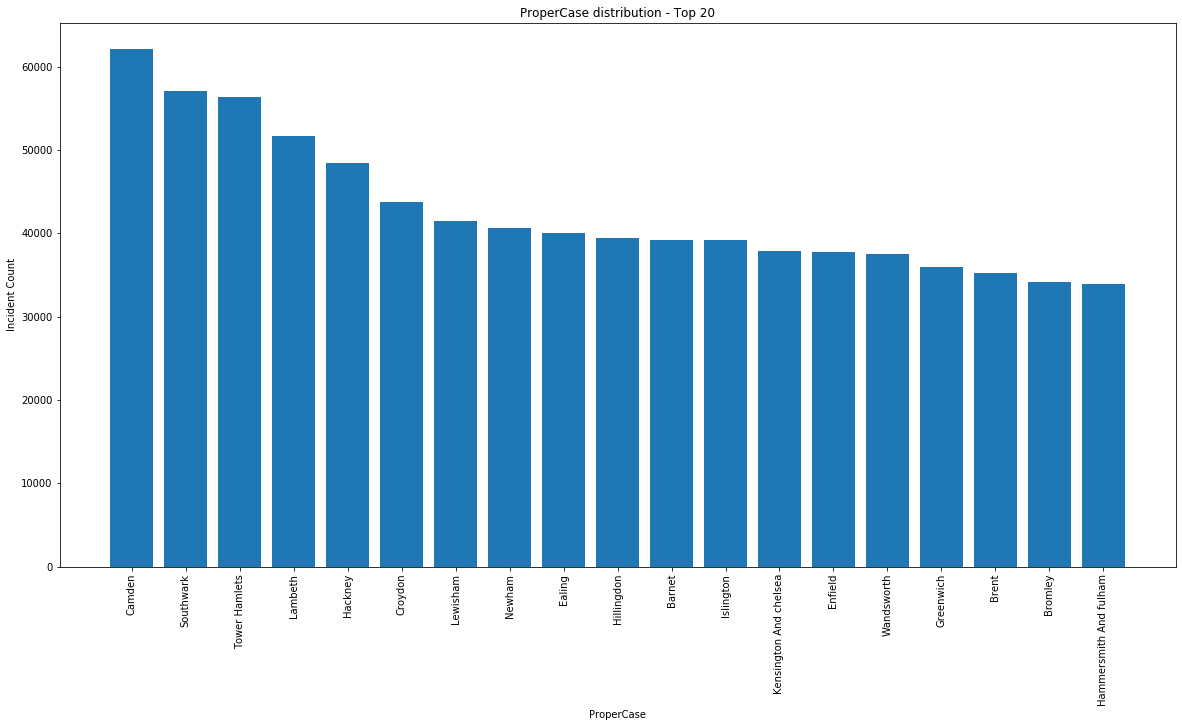

In [25]:
plt.figure(figsize=(20,10))
plt.bar(df.ProperCase.value_counts().index[1:20], df.ProperCase.value_counts().values[1:20])
plt.xticks(rotation=90)
plt.title('ProperCase distribution - Top 20');
plt.xlabel('ProperCase');
plt.ylabel('Incident Count');

<font color='red'>Seems that ProperCase is the same as IncGeo_BoroughName but not using cap locks :)</font>

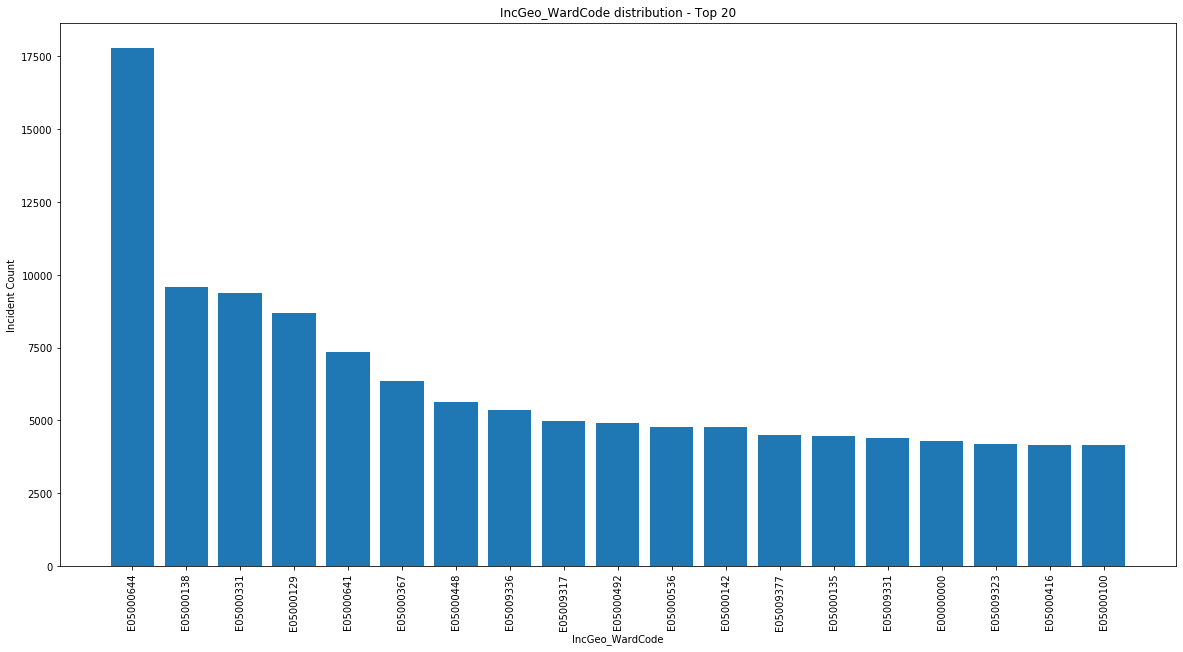

In [26]:
plt.figure(figsize=(20,10))
plt.bar(df.IncGeo_WardCode.value_counts().index[1:20], df.IncGeo_WardCode.value_counts().values[1:20])
plt.xticks(rotation=90)
plt.title('IncGeo_WardCode distribution - Top 20');
plt.xlabel('IncGeo_WardCode');
plt.ylabel('Incident Count');

<font color='red'>Here there is a clear spike with E0500644 being close to twice the size of the next ward code.</font>

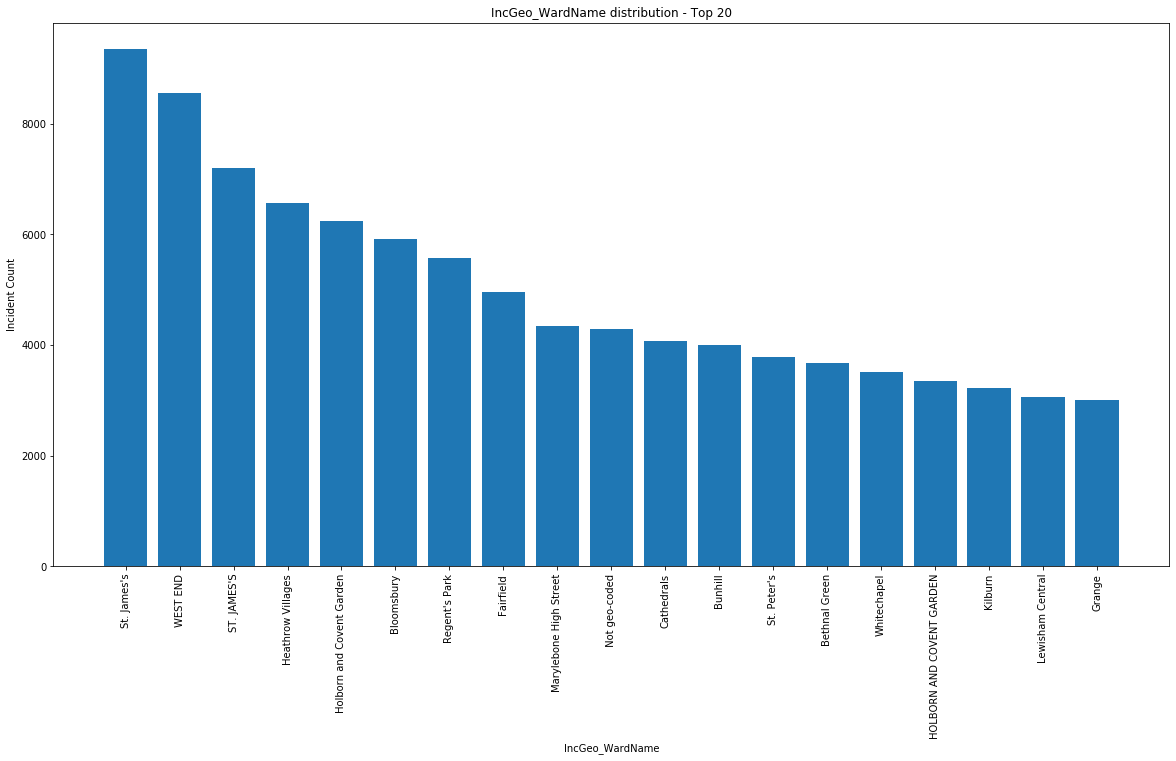

In [27]:
plt.figure(figsize=(20,10))
plt.bar(df.IncGeo_WardName.value_counts().index[1:20], df.IncGeo_WardName.value_counts().values[1:20])
plt.xticks(rotation=90)
plt.title('IncGeo_WardName distribution - Top 20');
plt.xlabel('IncGeo_WardName');
plt.ylabel('Incident Count');

<font color='red'>Interesting that here we don't have the same distribution as in the IncGeo_WardCode. We can see that we have at least two differet ways that St. James's is represented in the data, some have capslocks and others have initcap.</font>

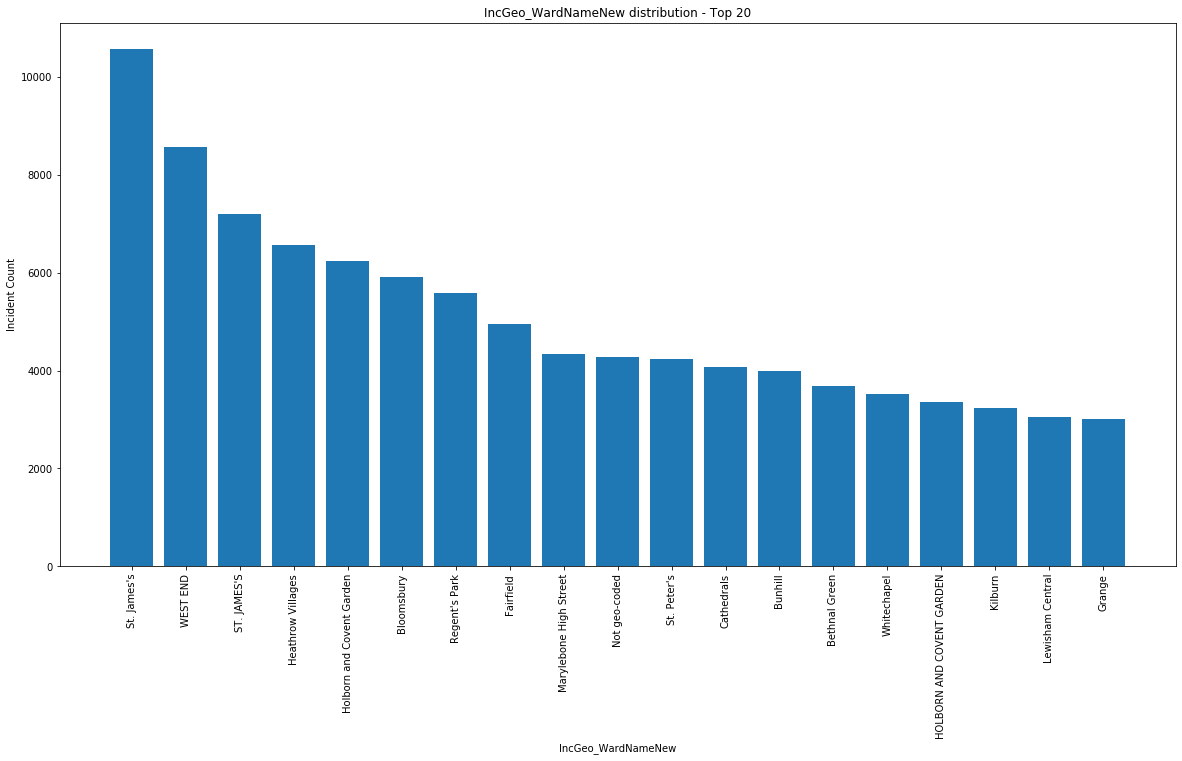

In [32]:
plt.figure(figsize=(20,10))
plt.bar(df.IncGeo_WardNameNew.value_counts().index[1:20], df.IncGeo_WardNameNew.value_counts().values[1:20])
plt.xticks(rotation=90)
plt.title('IncGeo_WardNameNew distribution - Top 20');
plt.xlabel('IncGeo_WardNameNew');
plt.ylabel('Incident Count');

Text(0, 0.5, 'Incident Count')

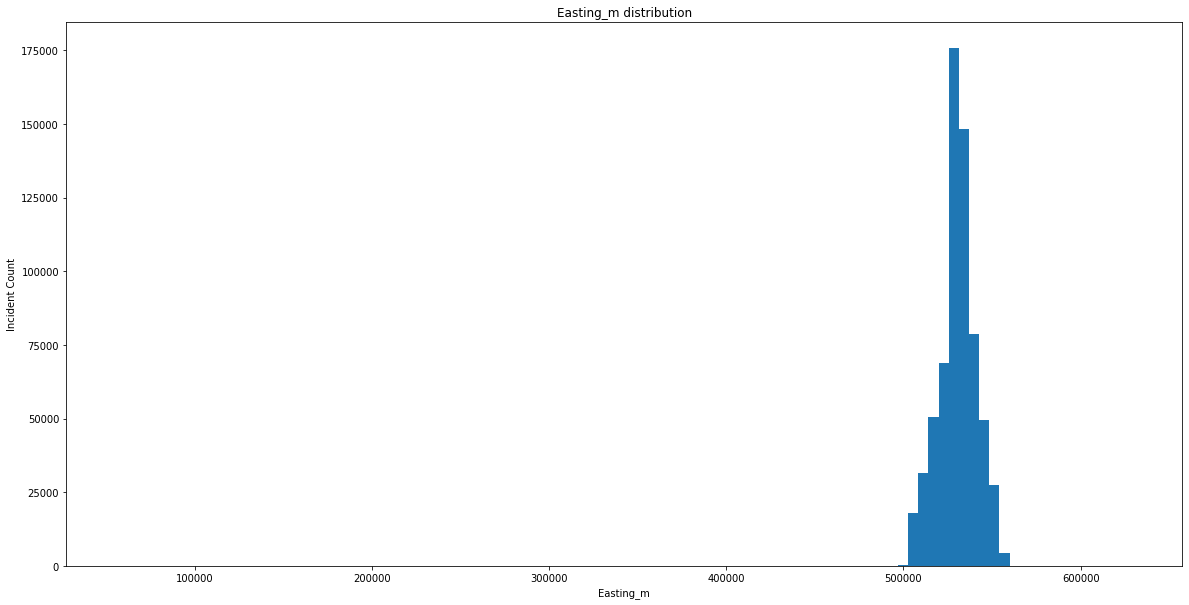

In [35]:
plt.figure(figsize=(20,10))
plt.hist(df.Easting_m, 100);
plt.title('Easting_m distribution')
plt.xlabel('Easting_m')
plt.ylabel('Incident Count')

Text(0, 0.5, 'Incident Count')

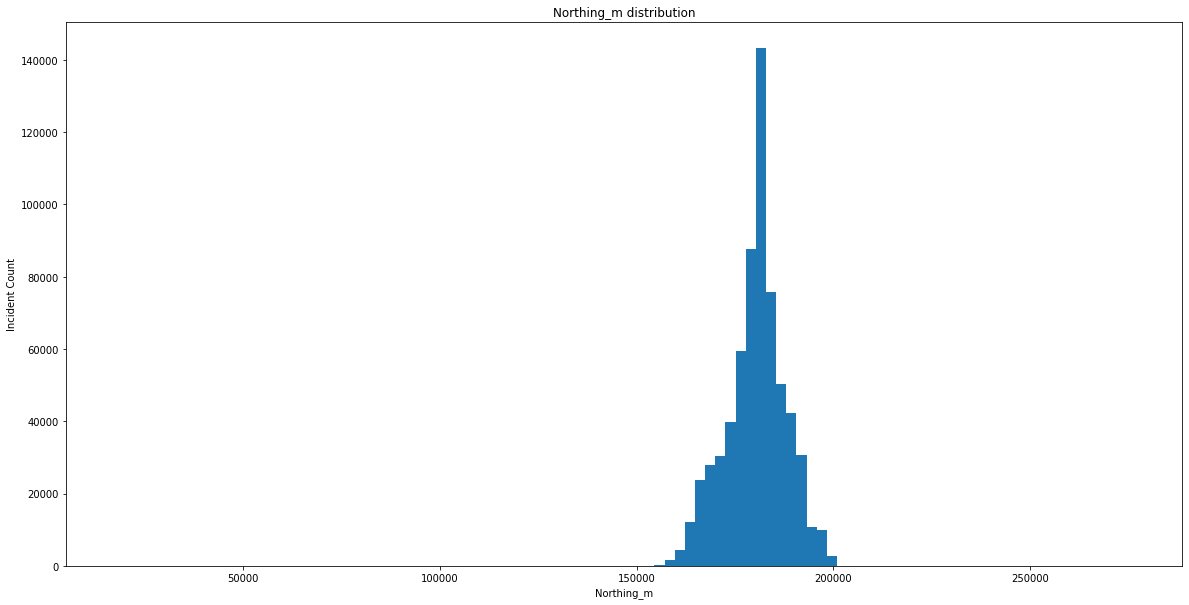

In [40]:
plt.figure(figsize=(20,10))
plt.hist(df.Northing_m, 100);
plt.title('Northing_m distribution')
plt.xlabel('Northing_m')
plt.ylabel('Incident Count')

Text(0, 0.5, 'Incident Count')

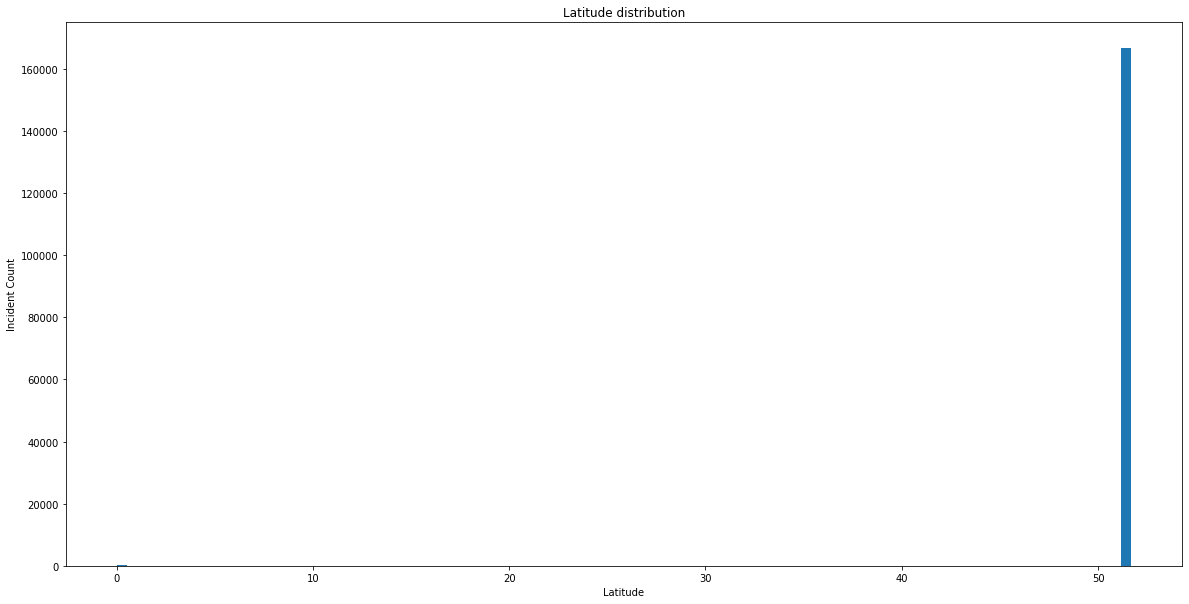

In [39]:
plt.figure(figsize=(20,10))
plt.hist(df.Latitude, 100);
plt.title('Latitude distribution')
plt.xlabel('Latitude')
plt.ylabel('Incident Count')

<font color='red'>clearly there are some outliers - look at how the histogram looks without the outlier</font>

Text(0, 0.5, 'Incident Count')

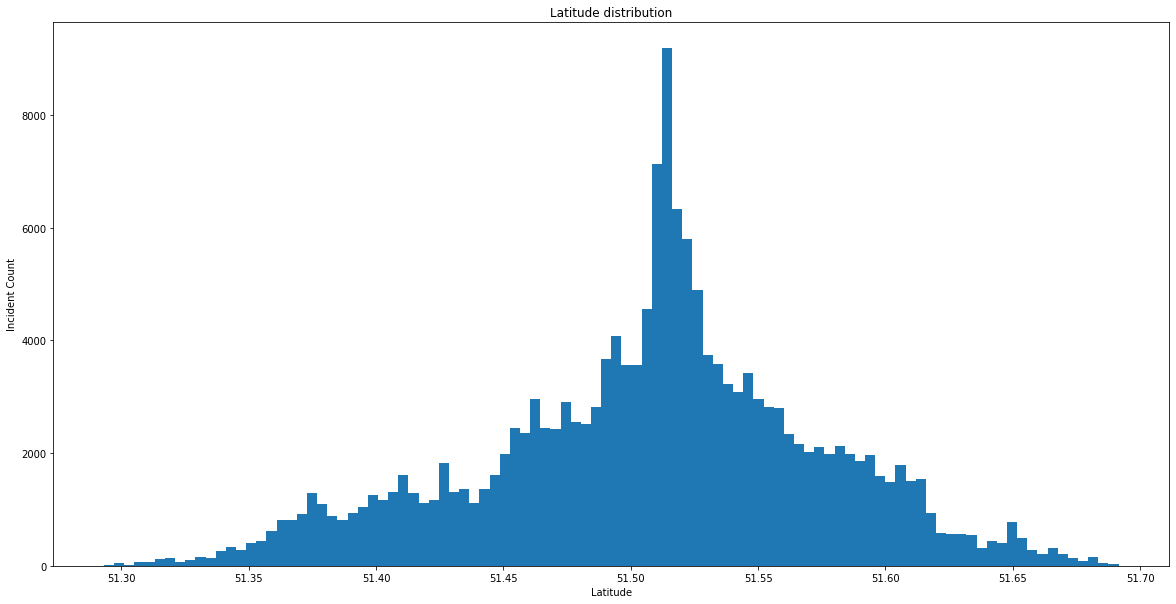

In [41]:
plt.figure(figsize=(20,10))
plt.hist(df.Latitude[df.Latitude>10], 100);
plt.title('Latitude distribution')
plt.xlabel('Latitude')
plt.ylabel('Incident Count')

Text(0, 0.5, 'Incident Count')

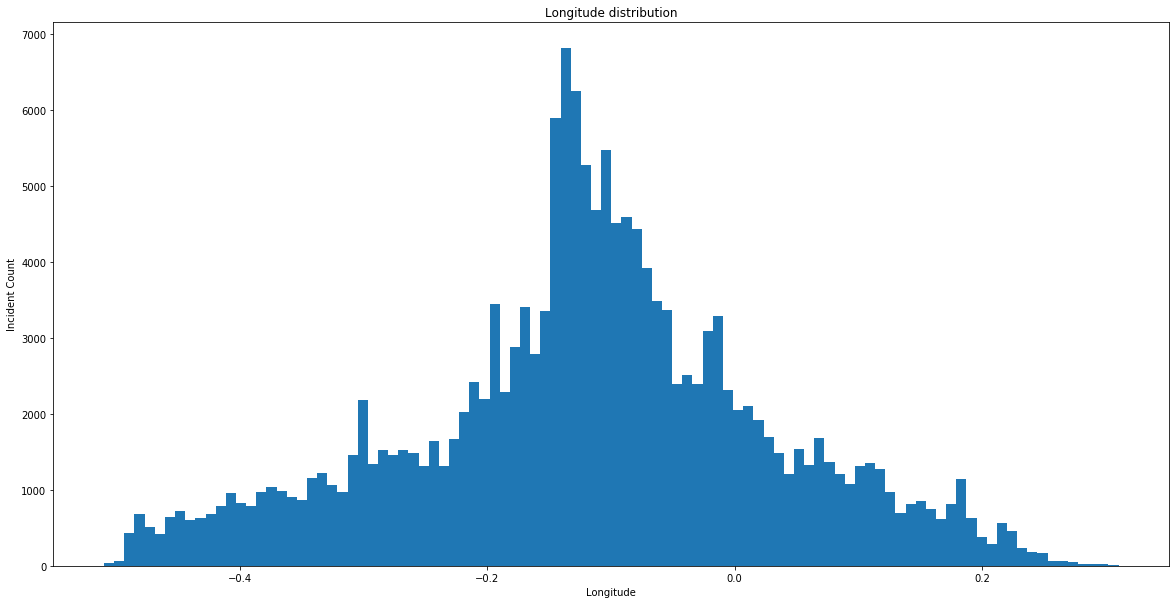

In [43]:
plt.figure(figsize=(20,10))
plt.hist(df.Longitude, 100);
plt.title('Longitude distribution')
plt.xlabel('Longitude')
plt.ylabel('Incident Count')

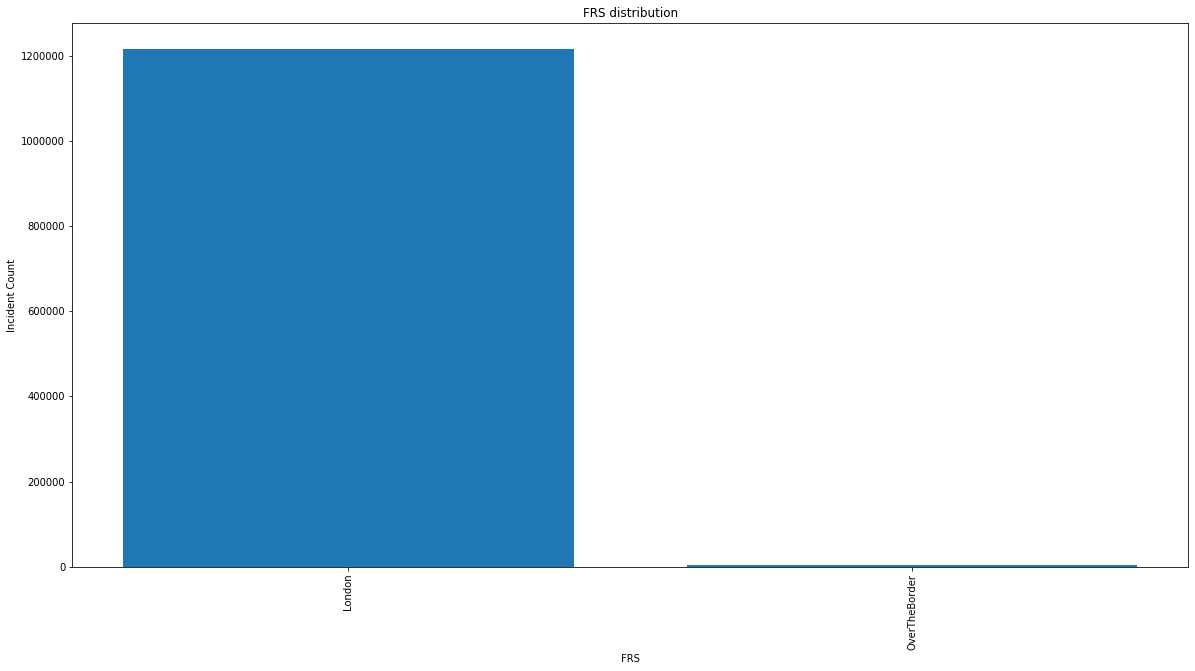

In [46]:
plt.figure(figsize=(20,10))
plt.bar(df.FRS.value_counts().index, df.FRS.value_counts().values)
plt.xticks(rotation=90)
plt.title('FRS distribution');
plt.xlabel('FRS');
plt.ylabel('Incident Count');

<font color='red'>Almost all the values are London - What does the other even mean? border to other cities?</font>

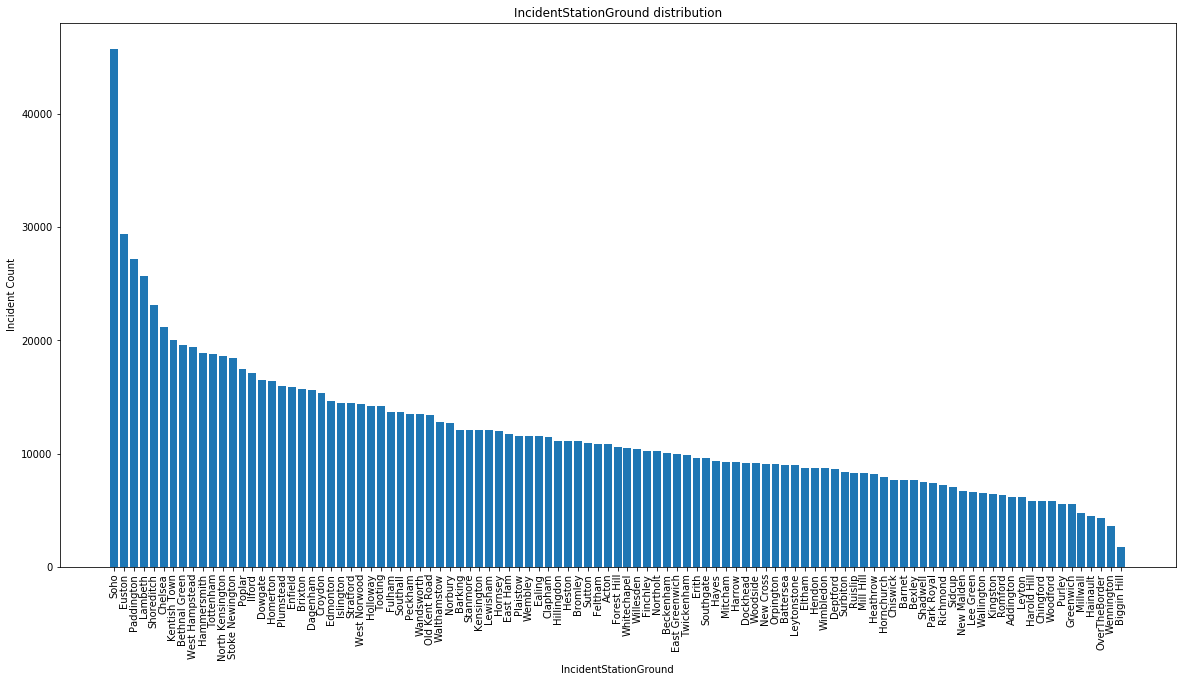

In [47]:
plt.figure(figsize=(20,10))
plt.bar(df.IncidentStationGround.value_counts().index, df.IncidentStationGround.value_counts().values)
plt.xticks(rotation=90)
plt.title('IncidentStationGround distribution');
plt.xlabel('IncidentStationGround');
plt.ylabel('Incident Count');

Text(0, 0.5, 'Incident Count')

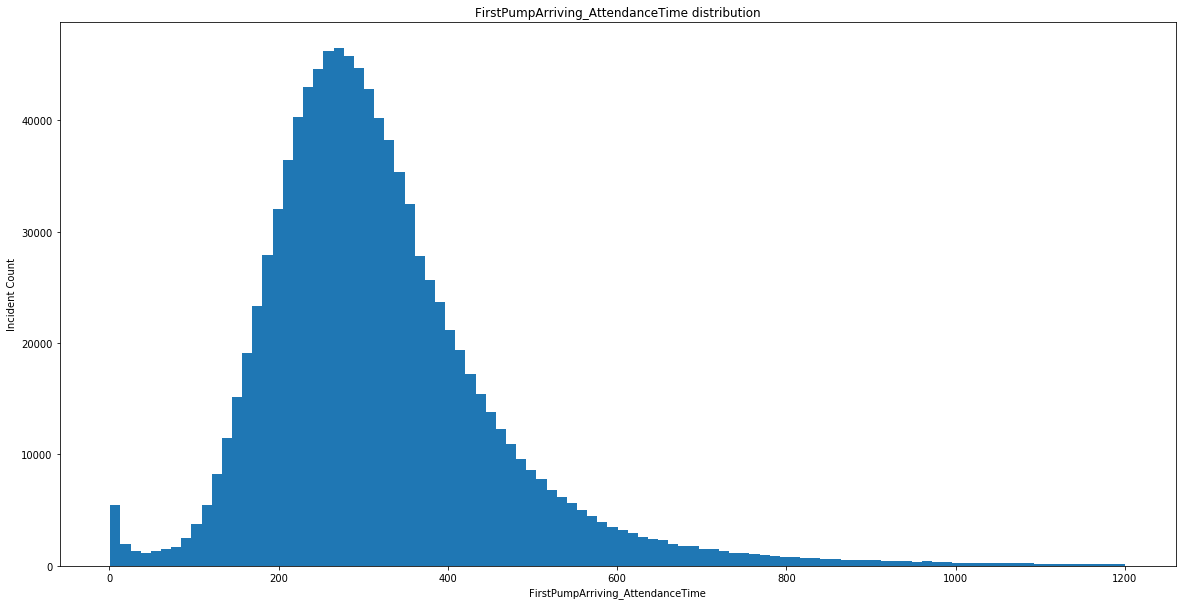

In [48]:
plt.figure(figsize=(20,10))
plt.hist(df.FirstPumpArriving_AttendanceTime, 100);
plt.title('FirstPumpArriving_AttendanceTime distribution')
plt.xlabel('FirstPumpArriving_AttendanceTime')
plt.ylabel('Incident Count')

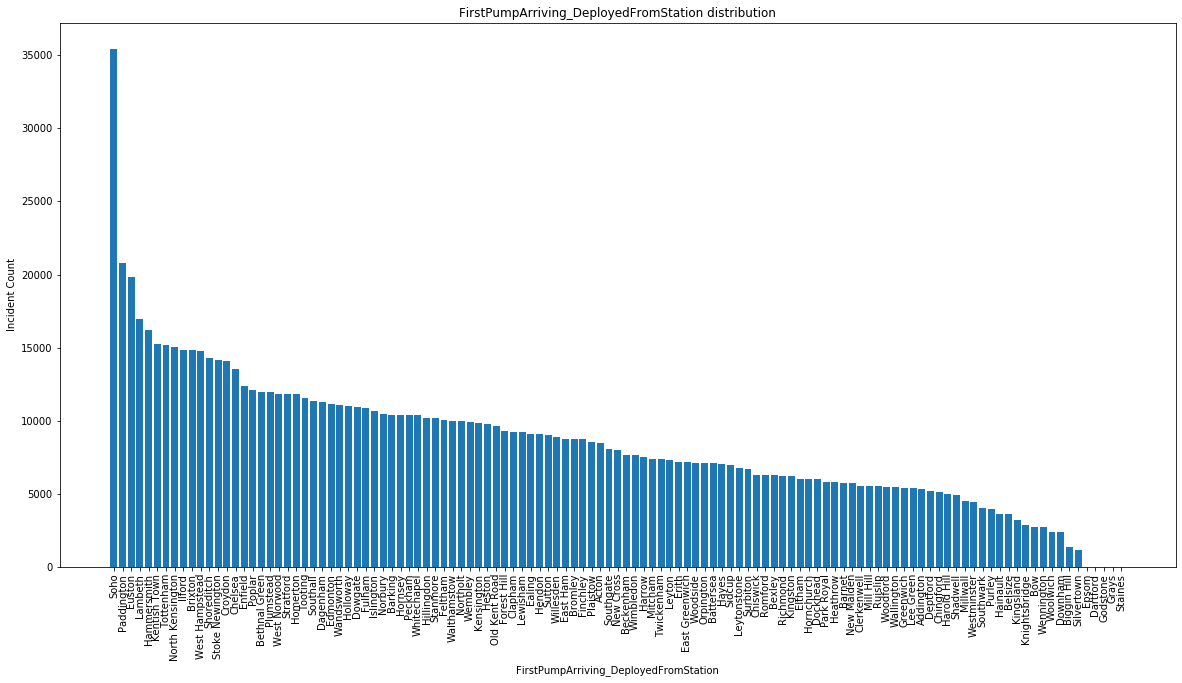

In [49]:
plt.figure(figsize=(20,10))
plt.bar(df.FirstPumpArriving_DeployedFromStation.value_counts().index, df.FirstPumpArriving_DeployedFromStation.value_counts().values)
plt.xticks(rotation=90)
plt.title('FirstPumpArriving_DeployedFromStation distribution');
plt.xlabel('FirstPumpArriving_DeployedFromStation');
plt.ylabel('Incident Count');

Text(0, 0.5, 'Incident Count')

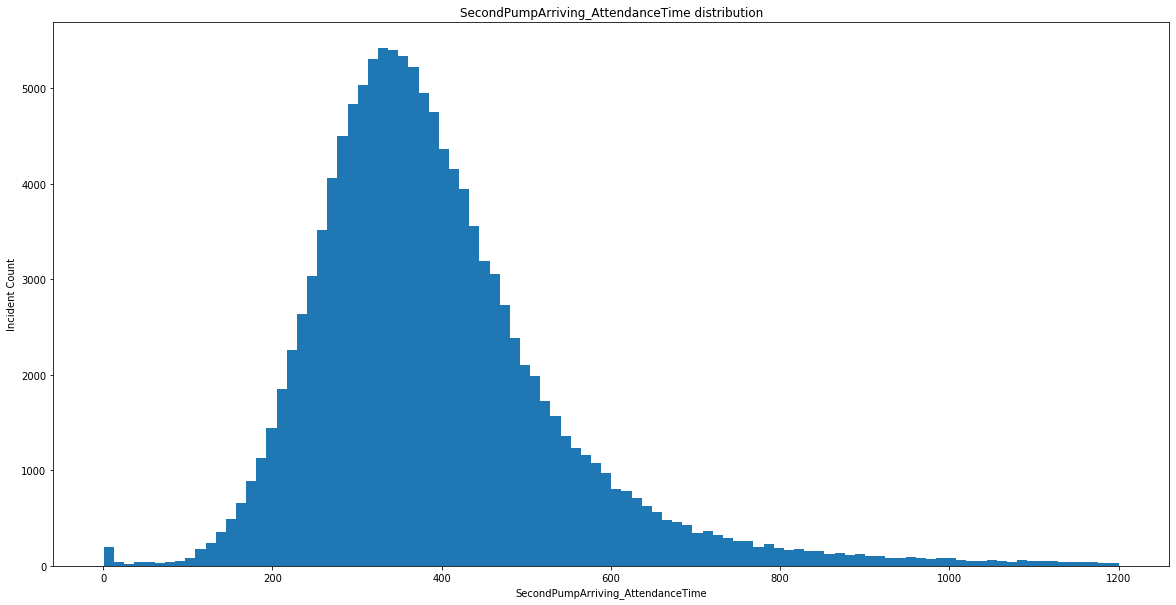

In [50]:
plt.figure(figsize=(20,10))
plt.hist(df.SecondPumpArriving_AttendanceTime, 100);
plt.title('SecondPumpArriving_AttendanceTime distribution')
plt.xlabel('SecondPumpArriving_AttendanceTime')
plt.ylabel('Incident Count')

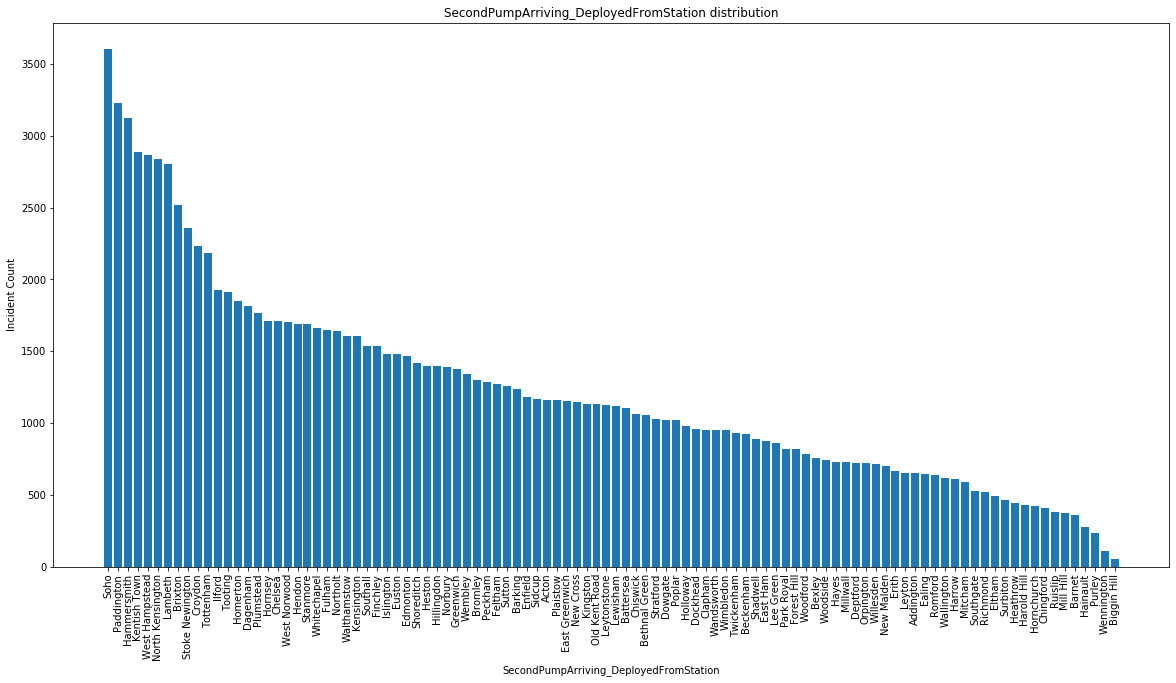

In [51]:
plt.figure(figsize=(20,10))
plt.bar(df.SecondPumpArriving_DeployedFromStation.value_counts().index, df.SecondPumpArriving_DeployedFromStation.value_counts().values)
plt.xticks(rotation=90)
plt.title('SecondPumpArriving_DeployedFromStation distribution');
plt.xlabel('SecondPumpArriving_DeployedFromStation');
plt.ylabel('Incident Count');

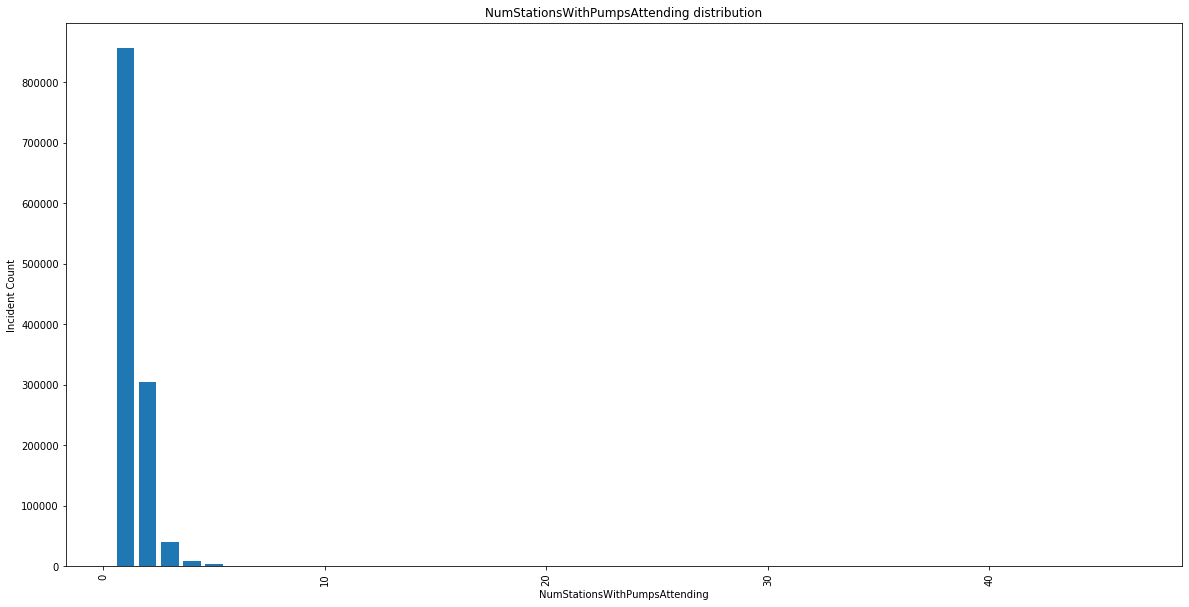

In [56]:
plt.figure(figsize=(20,10))
plt.bar(df.NumStationsWithPumpsAttending.value_counts().index, df.NumStationsWithPumpsAttending.value_counts().values)
plt.xticks(rotation=90)
plt.title('NumStationsWithPumpsAttending distribution');
plt.xlabel('NumStationsWithPumpsAttending');
plt.ylabel('Incident Count');

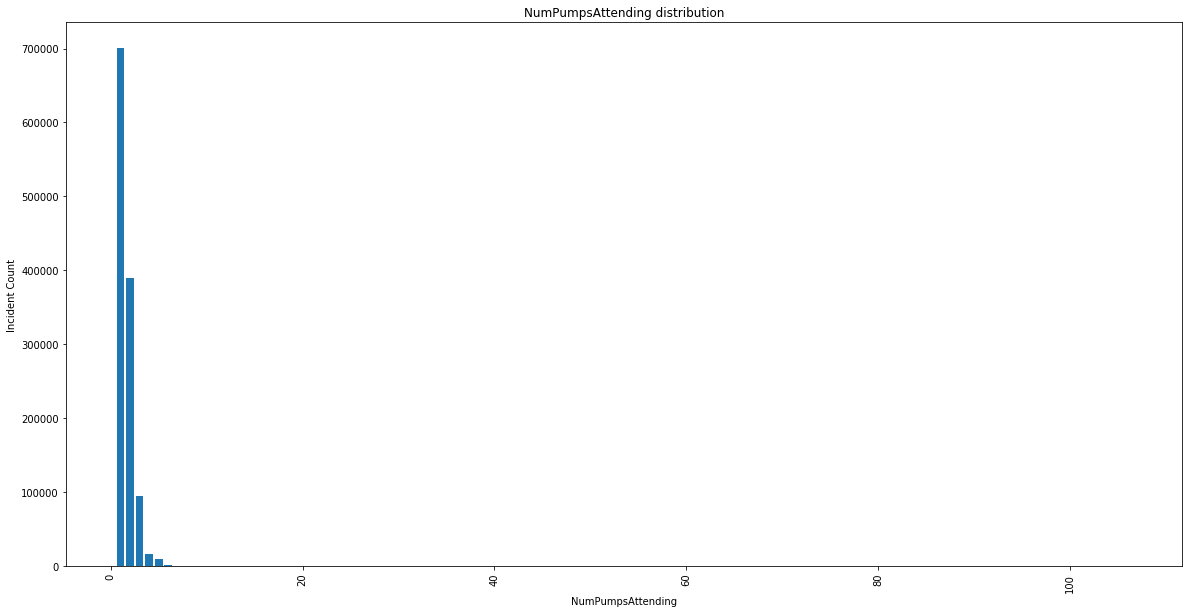

In [57]:
plt.figure(figsize=(20,10))
plt.bar(df.NumPumpsAttending.value_counts().index, df.NumPumpsAttending.value_counts().values)
plt.xticks(rotation=90)
plt.title('NumPumpsAttending distribution');
plt.xlabel('NumPumpsAttending');
plt.ylabel('Incident Count');

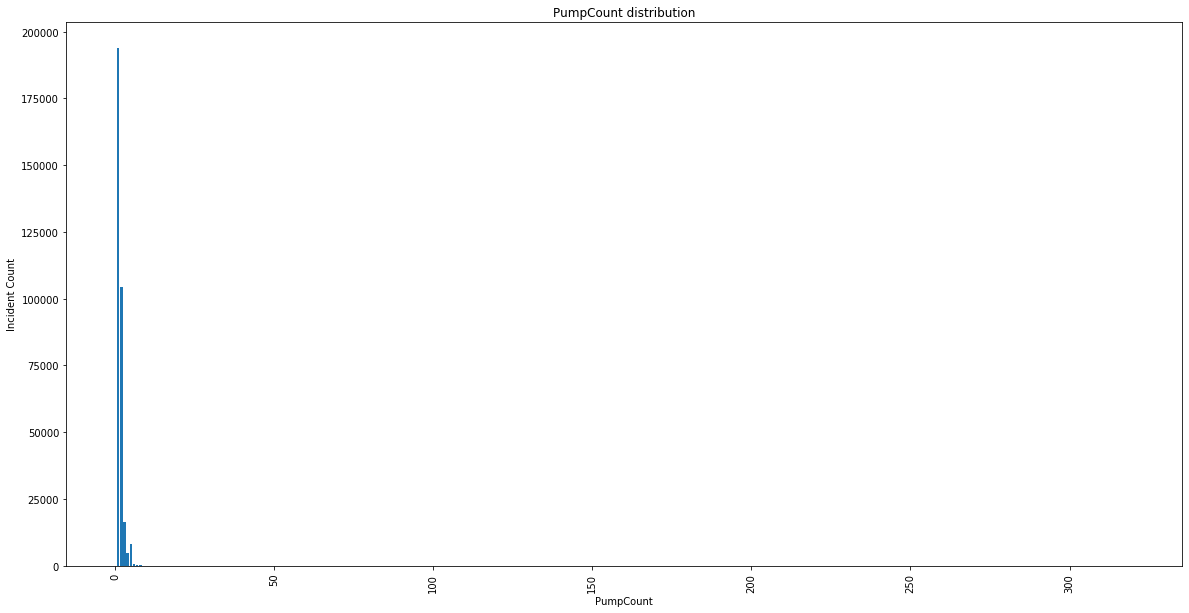

In [58]:
plt.figure(figsize=(20,10))
plt.bar(df.PumpCount.value_counts().index, df.PumpCount.value_counts().values)
plt.xticks(rotation=90)
plt.title('PumpCount distribution');
plt.xlabel('PumpCount');
plt.ylabel('Incident Count');

Text(0, 0.5, 'Incident Count')

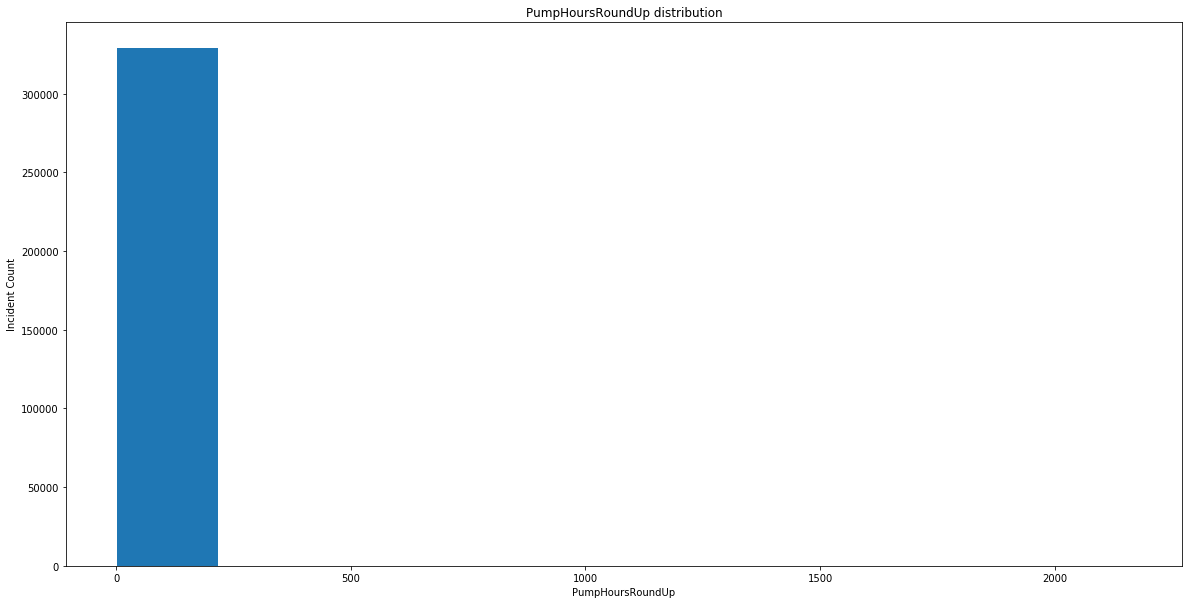

In [70]:
plt.figure(figsize=(20,10))
plt.hist(df.PumpHoursRoundUp);
plt.title('PumpHoursRoundUp distribution')
plt.xlabel('PumpHoursRoundUp')
plt.ylabel('Incident Count')

Text(0, 0.5, 'Incident Count')

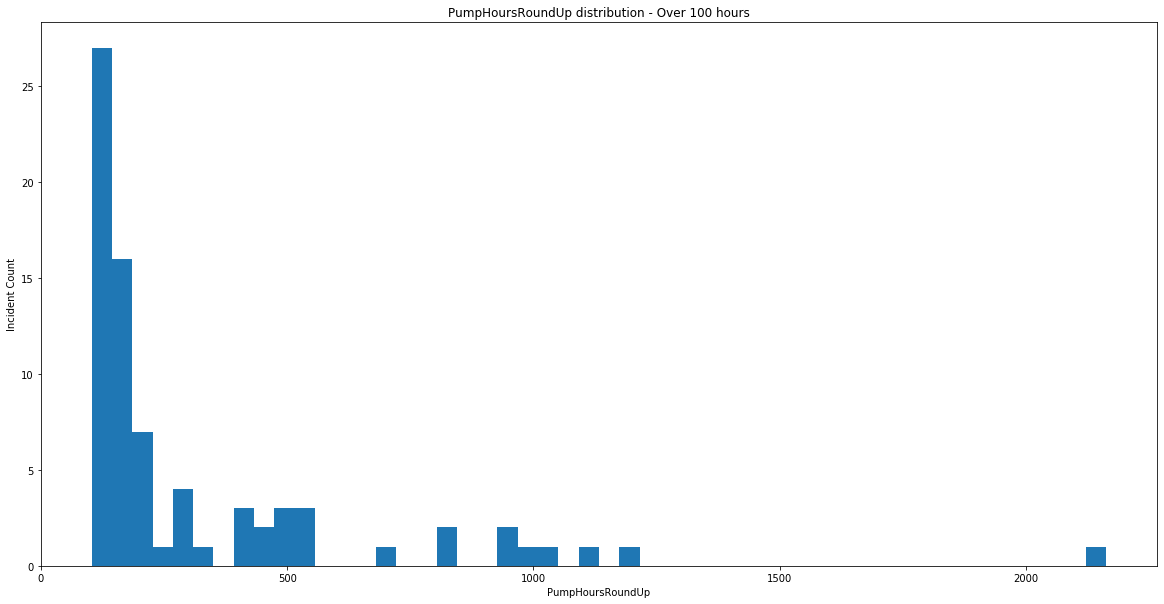

In [72]:
plt.figure(figsize=(20,10))
plt.hist(df.PumpHoursRoundUp[df.PumpHoursRoundUp>100], 50);
plt.title('PumpHoursRoundUp distribution - Over 100 hours')
plt.xlabel('PumpHoursRoundUp')
plt.ylabel('Incident Count')

Text(0, 0.5, 'Incident Count')

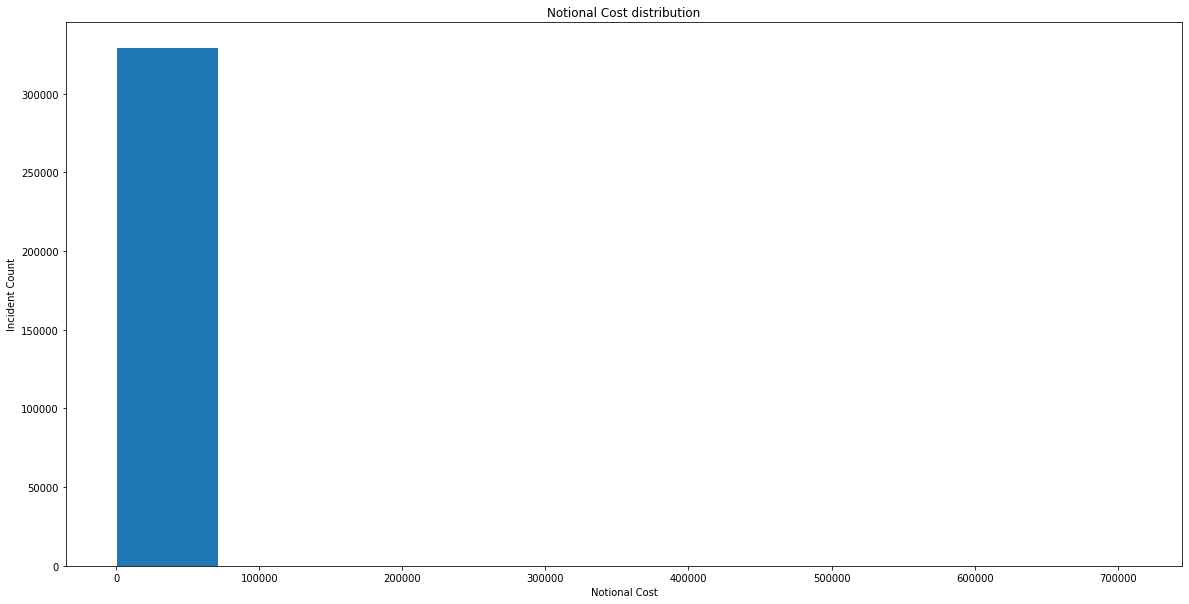

In [75]:

plt.figure(figsize=(20,10))
plt.hist(df['Notional Cost (£)']);
plt.title('Notional Cost distribution')
plt.xlabel('Notional Cost')
plt.ylabel('Incident Count')